# Amazon Apparel Recommendation System

### Retrieve and Inspect Dataset

In [1]:

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

data = pd.read_json('tops_fashion.json') 

In [3]:
print('Number of data points : ', data.shape[0])
 
print('Number of features/variables:', data.shape[1]) 

Number of data points :  183138
Number of features/variables: 19


In [4]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [5]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']] 

In [6]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


# 2. Basic Statistics

2.1 product_type_name

In [7]:
print(data['product_type_name'].describe()) 

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [8]:
# names of different product types
print(data['product_type_name'].unique()) 

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [9]:
from collections import Counter

# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10) 

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [10]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [11]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)
     

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [12]:

print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [13]:
# find the 10 most frequent color.
color_count = Counter(list(data['color']))
color_count.most_common(10) 

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [14]:
print(data['formatted_price'].describe()) 

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [15]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10) 

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [16]:
print(data['title'].describe()) 

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


All of the products have a title.

Titles are fairly descriptive of what the product is.

We will use titles extensively in this project as they are short and informative.

By watching the 'count', we can say that 'title' feature is available for most items. This makes it most important feature too.

In [17]:
data.isnull().sum() 

asin                      0
brand                   151
color                118182
medium_image_url          0
product_type_name         0
title                     0
formatted_price      154743
dtype: int64

In [ ]:
data.to_pickle('180k_apparel_data')

In [18]:
# consider products which have price information, data['formatted_price'].isnull() => gives the information 
# about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
#This will store those values whose 'formatted_price' is not null
print('Number of data points After eliminating price = NULL :', data.shape[0]) 

Number of data points After eliminating price = NULL : 28395


In [19]:
# consider products which have color information
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color = NULL :', data.shape[0]) 

Number of data points After eliminating color = NULL : 28385


In [20]:
data.to_pickle('28k_apparel_data')

In [21]:
print(sum(data.duplicated('title')))

2325


In [22]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0]) 

After removal of products with short description: 27949


In [23]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


# Some examples of duplicate titles that differ only in the last few words.
Titles 1:

16. woman's place is in the house and the senate shirts for Womens XXL White

17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:

25. tokidoki The Queen of Diamonds Women's Shirt X-Large

26. tokidoki The Queen of Diamonds Women's Shirt Small

27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:

61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt

62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt

63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt

64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt

In [108]:
indices = []               
for i, row in data_sorted.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs.
#     print(i)
    indices.append(i) 

In [25]:
import itertools

# We'll remove the duplicates which differ only at the end.
duplicates = []  
# 2 variables used at iterators.
i = 0
j = 0
num_data_points = data_sorted.shape[0]   # Number of data points in our dataframe.

while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially as they are arranged alphabetically. 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings.
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings.
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a, b): 
            if (k[0] == k[1]):          # Checking if the pair made is same or not.
                count += 1              # If one pair is same, we'll increase the count by 1.

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different.
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them.
        if (length - count) > 2: # number of words in which both sentences differ.
            # if both strings are differ by more than 2 words we include the 1st string index.
            duplicates.append(data_sorted['asin'].loc[indices[i]])

            # if the comparision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both.
            if j == num_data_points-1: duplicates.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string.
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [26]:
data = data.loc[data['asin'].isin(duplicates)] 

In [27]:
data.to_pickle('17k_apparel_data')

In [28]:
print('Number of data points at final stage:', data.shape[0])

Number of data points at final stage: 17593


# [5.2.3] Remove duplicates : Part 2

In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title
But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1

 86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large

 115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2

 75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee

 109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees

 120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

In [29]:
data = pd.read_pickle('17k_apparel_data')

In [30]:
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [31]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [32]:
print('Number of data points after stage two of dedupe: ',data.shape[0])
# from 17k apperals we reduced to 16k apperals

Number of data points after stage two of dedupe:  16435


In [33]:
data.to_pickle('16k_apperal_data')
# Storing these products in a pickle file
# candidates who wants to download these files instead 
# of 180K they can download and use them from the Google Drive folder.

# 6. Text pre-processing

In [34]:
data = pd.read_pickle('16k_apperal_data')

In [74]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalpha()))
            # Convert all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                if word.isalpha():
                    string += word + " "
        data[column][index] = string

list of stop words: {'in', 'no', 'ain', 'or', 'i', 'whom', "mustn't", 'here', "wasn't", 'd', 'when', 'of', 'had', 't', 'on', 'their', 'theirs', 'his', 'have', 'all', 'than', 'hasn', 'some', "you're", 'above', 'how', "mightn't", "don't", 'has', 'between', 'both', 'very', 'should', 'then', 'm', 'through', 'doesn', 'weren', 'shouldn', 'he', 's', 'who', 'against', "you'd", 'these', 'only', 'but', 'other', 'into', 'will', "weren't", 'ma', 'further', 'which', 'me', 'most', 'mightn', 'mustn', "you've", 'again', 'just', 'to', "needn't", 'ourselves', 'is', 'isn', 'if', 'over', 'too', 'not', 'hers', 'those', 'under', 'o', 'haven', 'as', 'so', 'shan', "you'll", 'wouldn', 'from', 'its', 'himself', 'this', "doesn't", 'before', 'y', 'did', 'itself', 'hadn', 'didn', 'the', 'wasn', 'there', 'where', 'yours', 'aren', 'them', "aren't", "hasn't", "shan't", 'ours', 'at', 'can', "she's", 'below', 'your', 'couldn', 'am', 'more', 'be', 'because', 'once', 'was', 'nor', "didn't", "hadn't", 'with', 'any', 'havi

In [109]:
start_time = time.perf_counter()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
#     print(data['title'][index])
# we print the time it took to preprocess whole titles 
print(time.perf_counter() - start_time, "seconds")

2.919999199999438 seconds


In [90]:
data.to_pickle('15k_apperal_data')

In [94]:
k=np.array(data['title'])
k[0]

'featherlite ladies long sleeve stain resistant tapered twill shirt xl onyx black stone '

In [96]:
s=set()
for i in range(16435):
    a=[x for x in k[i].split()]
    for j in range(len(a)):
        s.add(a[j])

In [98]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique cotton special olympics world ga...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


# [8] Text based product similarity

In [99]:
data = pd.read_pickle('15k_apperal_data')
data.head()
data.shape

(16435, 7)

In [100]:
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

    
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()

        
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)   
    
    
# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)    

# [8.1] Bag of Words (BoW) on product titles.

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() 

(16435, 11258)

In [102]:
a=[[0,0,1],[1,1,1]]
b=[[1,1,0]]
c=pairwise_distances(a,b)
print(c)
indices = np.argsort(c.flatten())
indices

[[1.73205081]
 [1.        ]]


array([1, 0], dtype=int64)

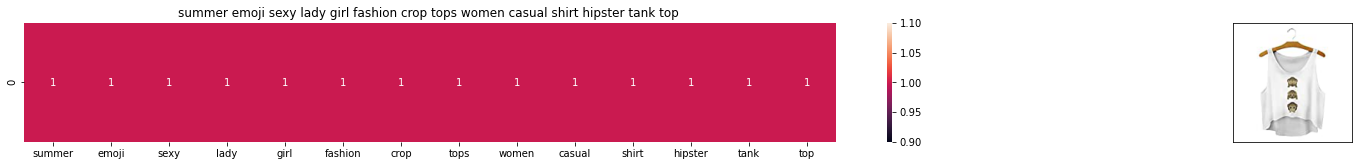

ASIN : B010V3BDII
Brand: Doxi Supermall
Title: summer emoji sexy lady girl fashion crop tops women casual shirt hipster tank top 
Euclidean similarity with the query image : 0.0


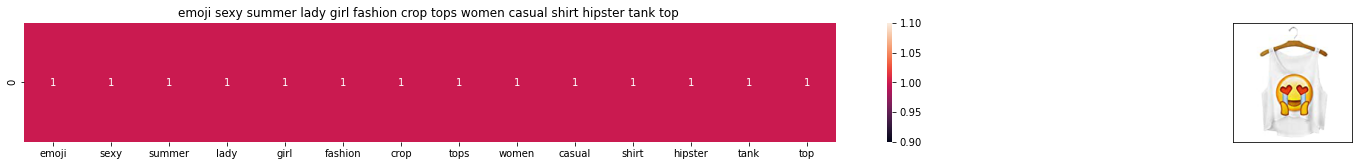

ASIN : B010V3BLWQ
Brand: Doxi Supermall
Title: emoji sexy summer lady girl fashion crop tops women casual shirt hipster tank top 
Euclidean similarity with the query image : 0.0


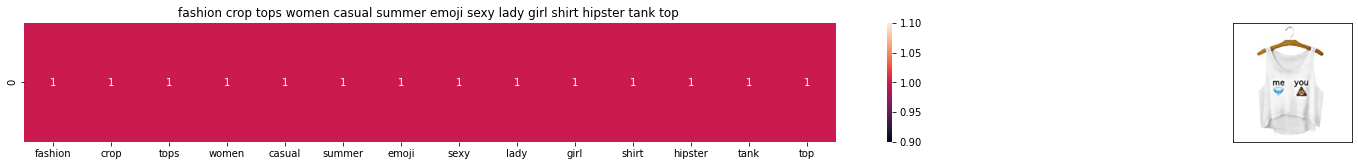

ASIN : B010V3B44G
Brand: Doxi Supermall
Title: fashion crop tops women casual summer emoji sexy lady girl shirt hipster tank top 
Euclidean similarity with the query image : 0.0


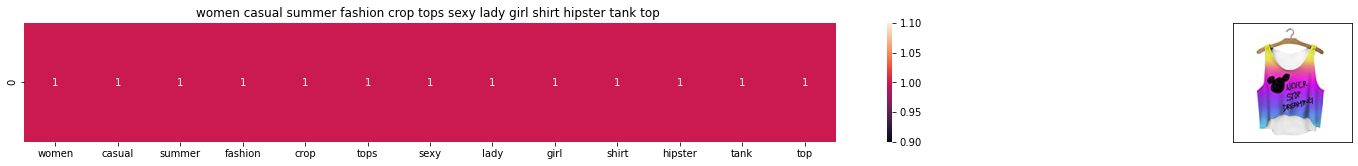

ASIN : B010V3AYSS
Brand: Doxi Supermall
Title: women casual summer fashion crop tops sexy lady girl shirt hipster tank top 
Euclidean similarity with the query image : 1.0


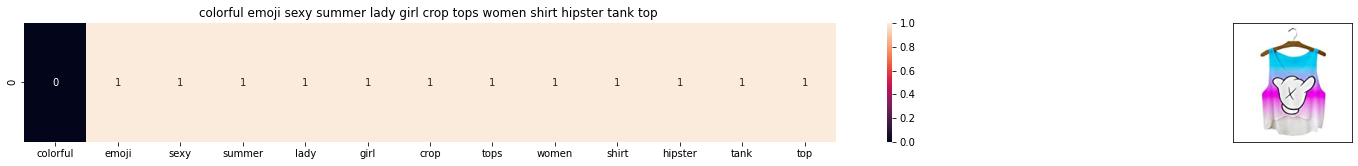

ASIN : B010V3BQZS
Brand: Doxi Supermall
Title: colorful emoji sexy summer lady girl crop tops women shirt hipster tank top 
Euclidean similarity with the query image : 1.7320508075688772


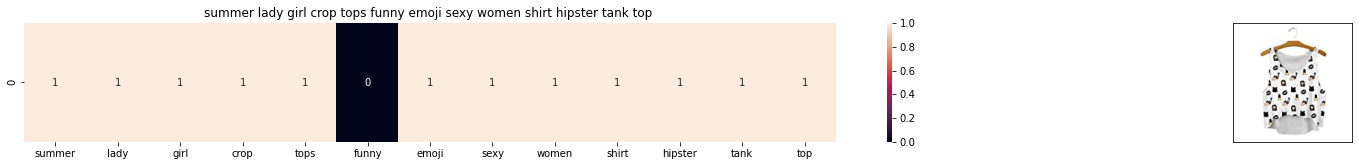

ASIN : B010V3BVMQ
Brand: Doxi Supermall
Title: summer lady girl crop tops funny emoji sexy women shirt hipster tank top 
Euclidean similarity with the query image : 1.7320508075688772


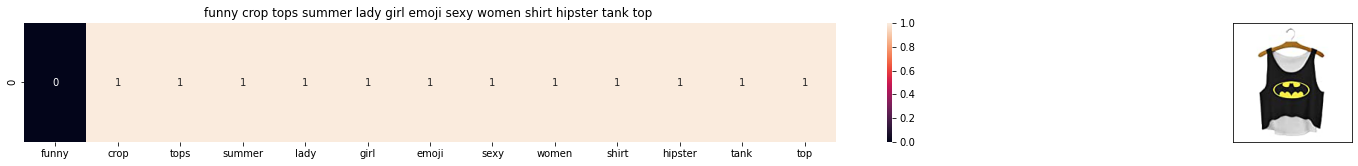

ASIN : B010V3C116
Brand: Doxi Supermall
Title: funny crop tops summer lady girl emoji sexy women shirt hipster tank top 
Euclidean similarity with the query image : 1.7320508075688772


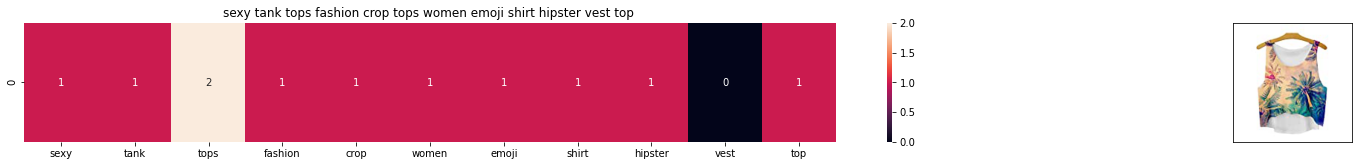

ASIN : B010V3DB9C
Brand: Doxi Supermall
Title: sexy tank tops fashion crop tops women emoji shirt hipster vest top 
Euclidean similarity with the query image : 2.449489742783178


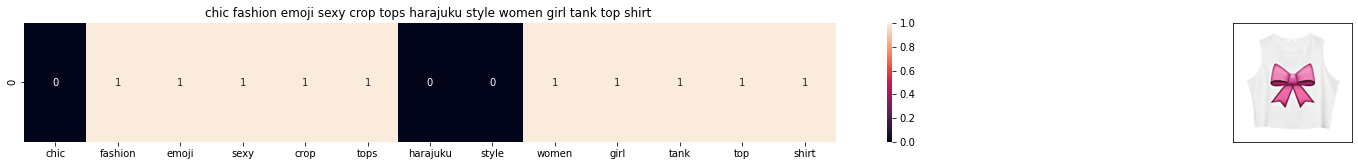

ASIN : B011RCJPR8
Brand: Chiclook Cool
Title: chic fashion emoji sexy crop tops harajuku style women girl tank top shirt 
Euclidean similarity with the query image : 2.6457513110645907


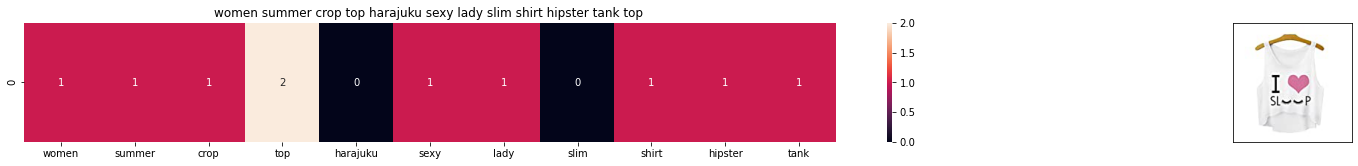

ASIN : B010V3EDEE
Brand: Doxi Supermall
Title: women summer crop top harajuku sexy lady slim shirt hipster tank top 
Euclidean similarity with the query image : 2.8284271247461903


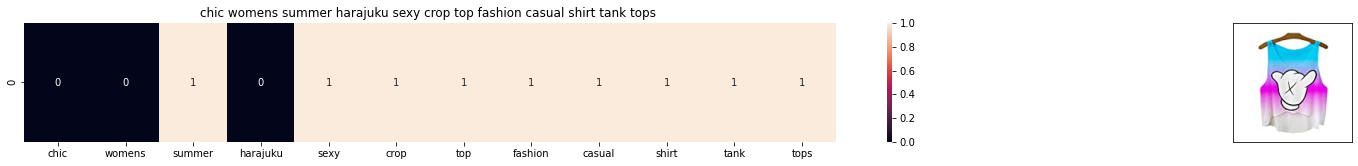

ASIN : B011RCJEMO
Brand: Chiclook Cool
Title: chic womens summer harajuku sexy crop top fashion casual shirt tank tops 
Euclidean similarity with the query image : 2.8284271247461903


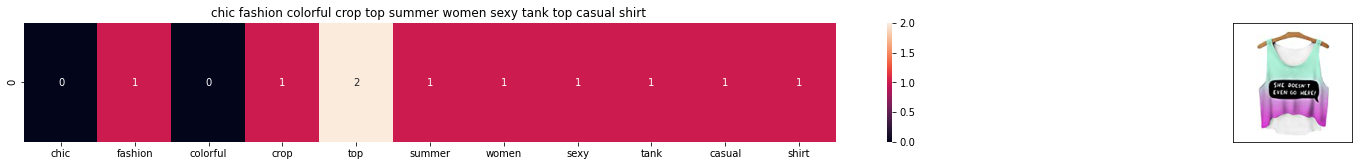

ASIN : B011RCJ6UE
Brand: Chiclook Cool
Title: chic fashion colorful crop top summer women sexy tank top casual shirt 
Euclidean similarity with the query image : 2.8284271247461903


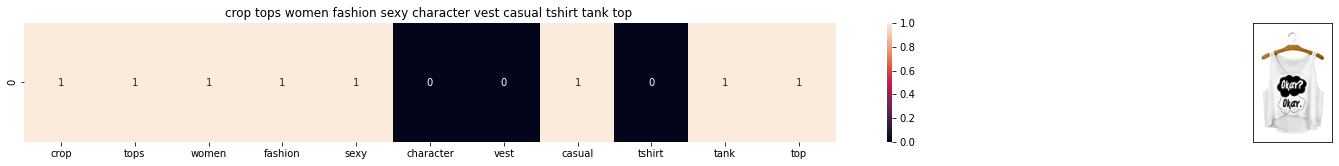

ASIN : B0107UEPVM
Brand: Mang GO
Title: crop tops women fashion sexy character vest casual tshirt tank top 
Euclidean similarity with the query image : 3.0


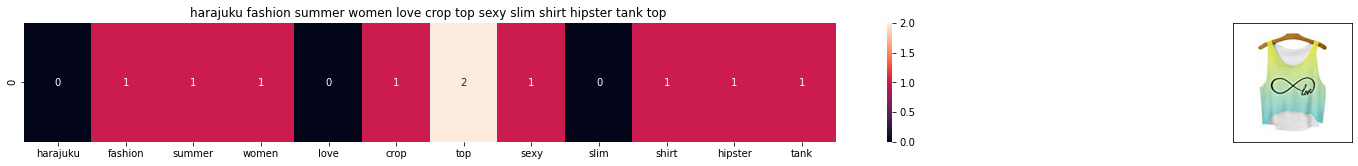

ASIN : B010V35OBU
Brand: Doxi Supermall
Title: harajuku fashion summer women love crop top sexy slim shirt hipster tank top 
Euclidean similarity with the query image : 3.0


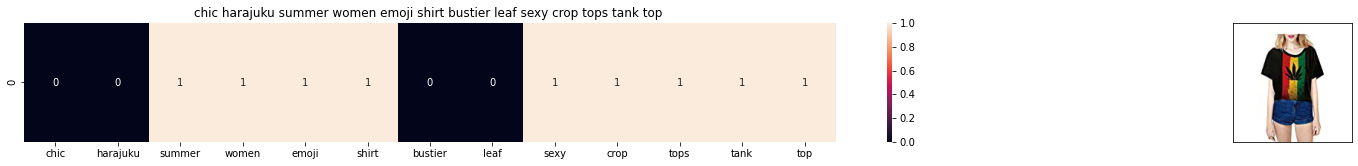

ASIN : B011UEXGH8
Brand: Chiclook Cool
Title: chic harajuku summer women emoji shirt bustier leaf sexy crop tops tank top 
Euclidean similarity with the query image : 3.0


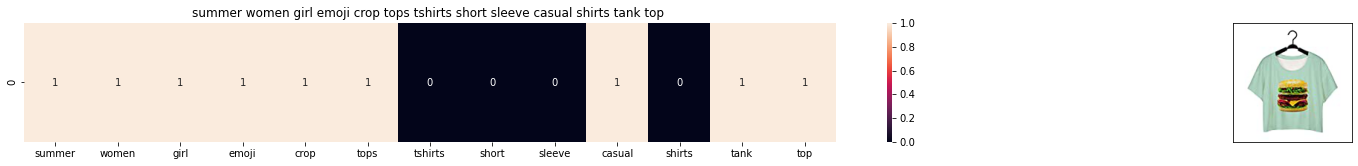

ASIN : B0124ECIU4
Brand: Doxi Supermall
Title: summer women girl emoji crop tops tshirts short sleeve casual shirts tank top 
Euclidean similarity with the query image : 3.0


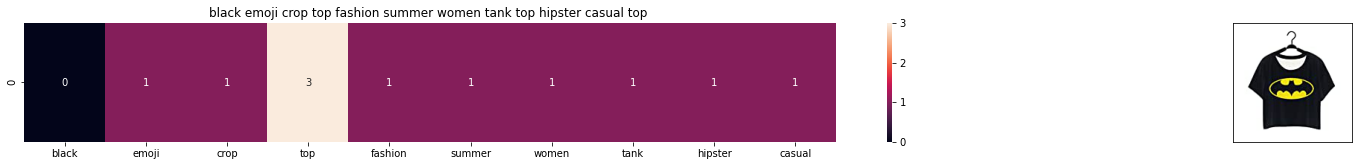

ASIN : B0124E80M4
Brand: Doxi Supermall
Title: black emoji crop top fashion summer women tank top hipster casual top 
Euclidean similarity with the query image : 3.1622776601683795


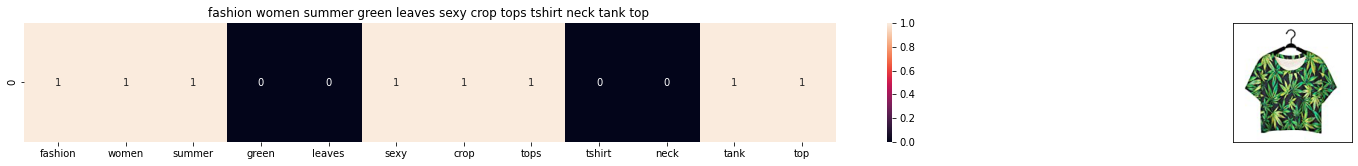

ASIN : B0124E7AW0
Brand: Doxi Supermall
Title: fashion women summer green leaves sexy crop tops tshirt neck tank top 
Euclidean similarity with the query image : 3.1622776601683795


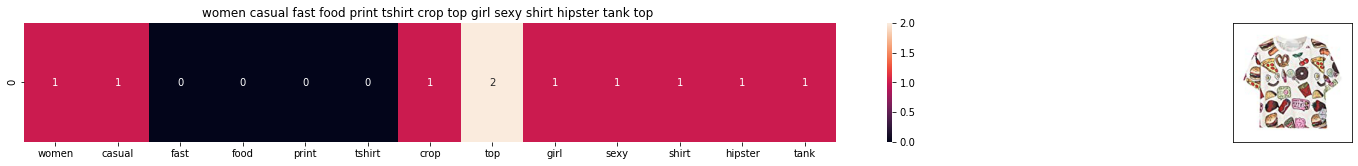

ASIN : B010V3AB5O
Brand: Doxi Supermall
Title: women casual fast food print tshirt crop top girl sexy shirt hipster tank top 
Euclidean similarity with the query image : 3.1622776601683795


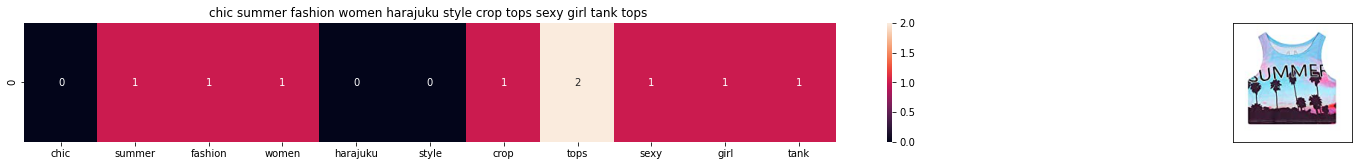

ASIN : B011OU51US
Brand: Chiclook Cool
Title: chic summer fashion women harajuku style crop tops sexy girl tank tops 
Euclidean similarity with the query image : 3.1622776601683795


In [103]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12566, 20) # change the index if you want to.

# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.

#try 12566
#try 931

# [8.5] TF-IDF based product similarity

In [104]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tfidf_title_features.shape  #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

(16435, 11258)

In [84]:
s=set()
for i in range(16435):
    a=[x for x in k[i].split()]
    for j in range(len(a)):
        s.add(a[j])

In [105]:
len(s)

11277

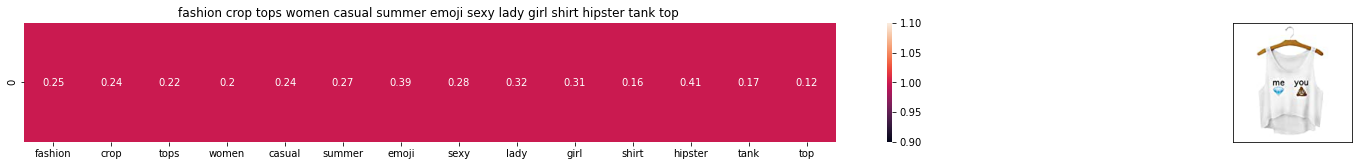

ASIN : B010V3B44G
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


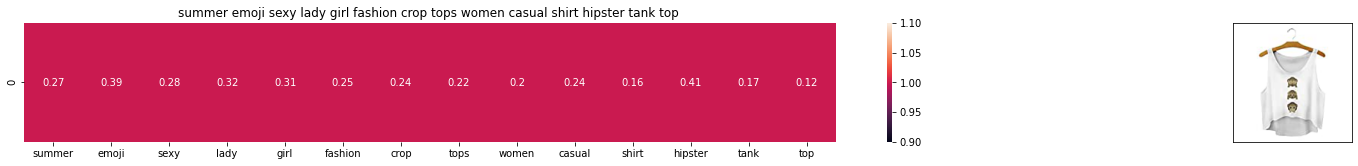

ASIN : B010V3BDII
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


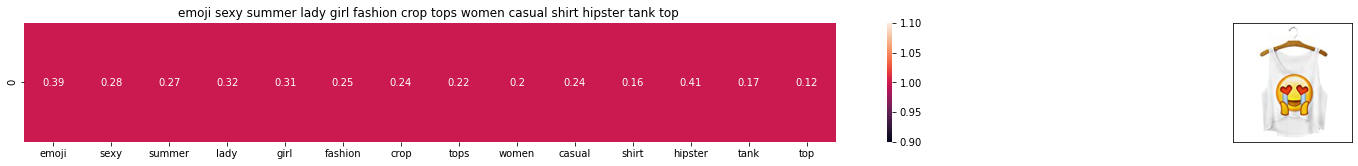

ASIN : B010V3BLWQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.0


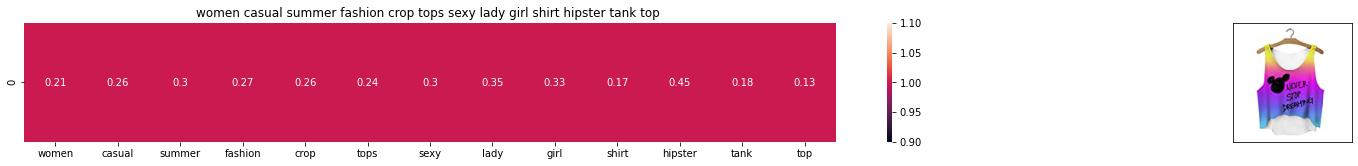

ASIN : B010V3AYSS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.4013892804332622


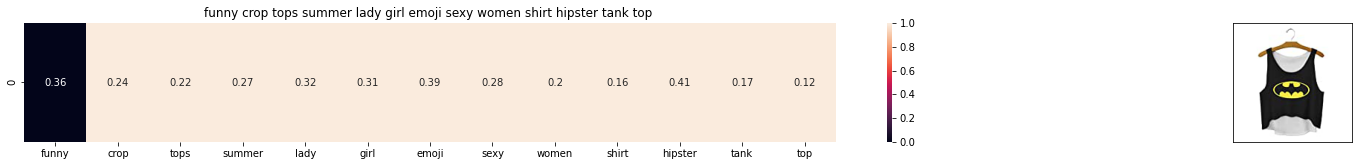

ASIN : B010V3C116
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.4954460748179155


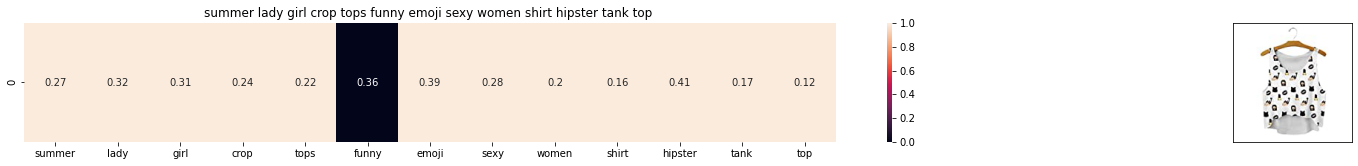

ASIN : B010V3BVMQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.4954460748179155


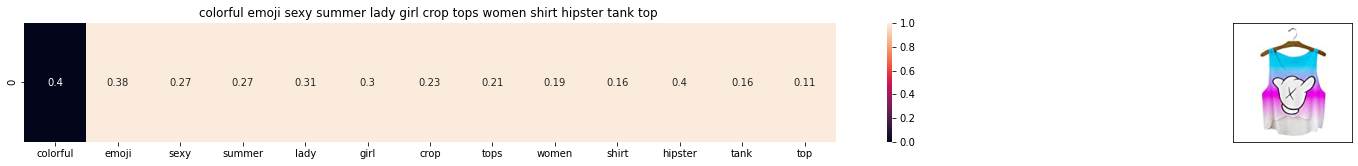

ASIN : B010V3BQZS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.5241729855622709


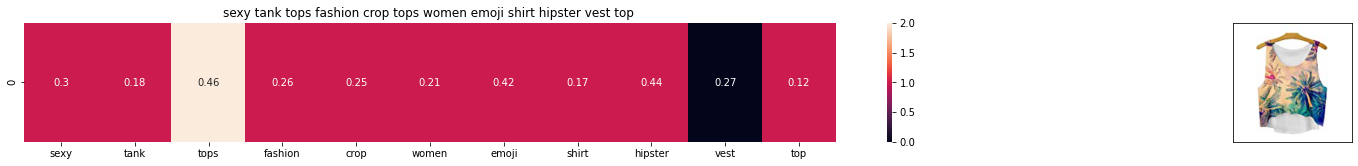

ASIN : B010V3DB9C
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.6832837937661241


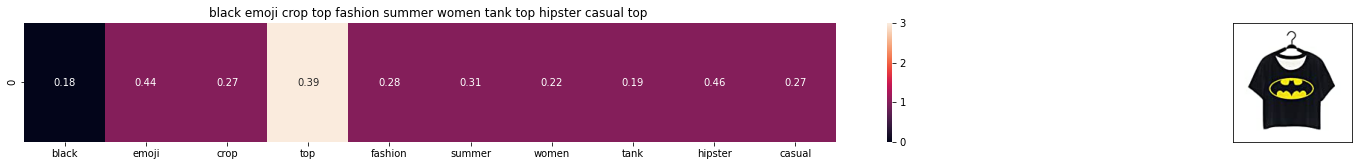

ASIN : B0124E80M4
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.6841060460662082


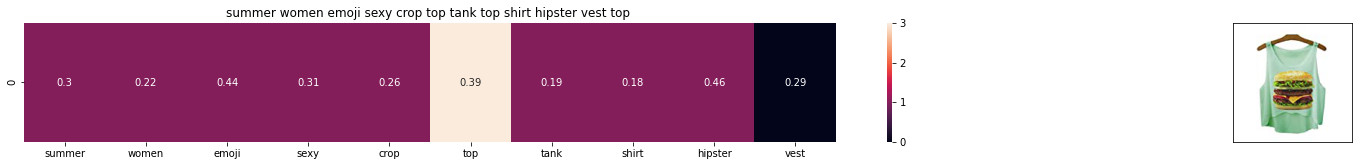

ASIN : B010V3E5EC
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.7250219916903087


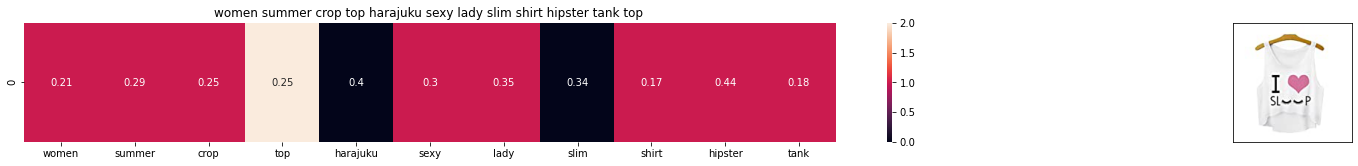

ASIN : B010V3EDEE
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.8437120878458978


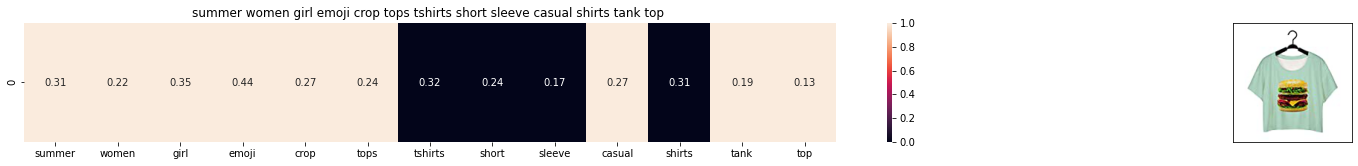

ASIN : B0124ECIU4
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.8552509384404429


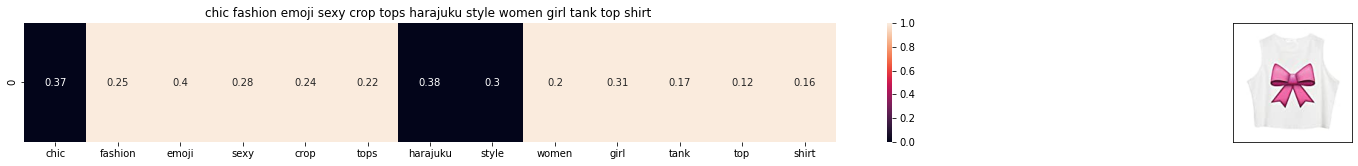

ASIN : B011RCJPR8
BRAND : Chiclook Cool
Eucliden distance from the given image : 0.882639304264948


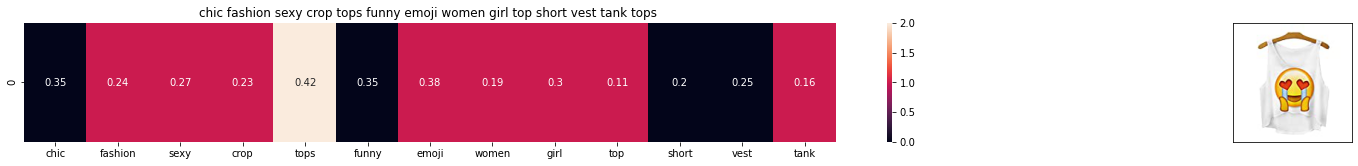

ASIN : B011RCJH58
BRAND : Chiclook Cool
Eucliden distance from the given image : 0.9004086225200374


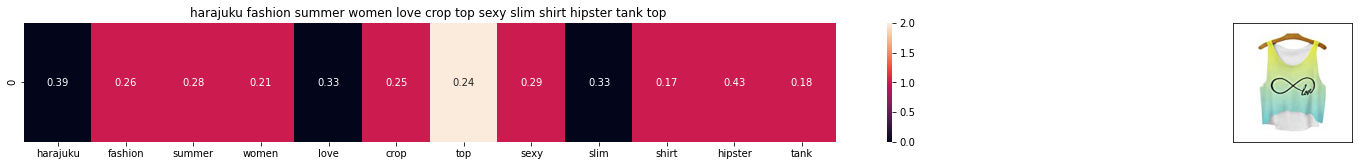

ASIN : B010V35OBU
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9172909773174703


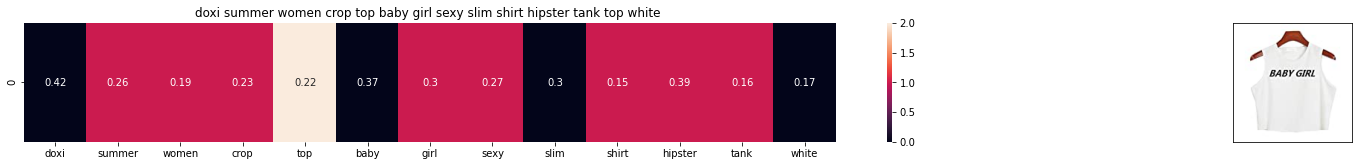

ASIN : B010V3A23U
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.930384081666644


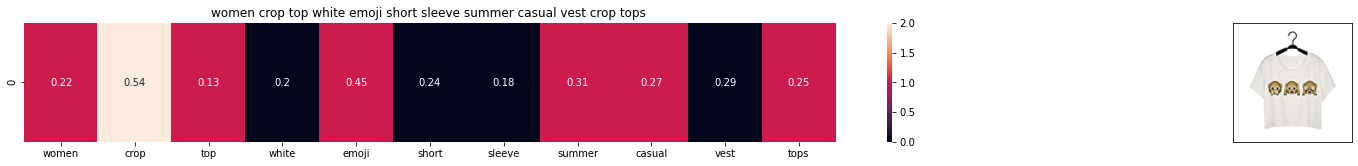

ASIN : B0124E7MHS
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9333479718161545


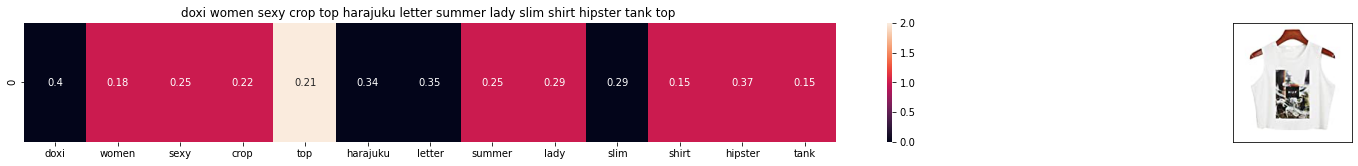

ASIN : B010V39146
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9525451871294602


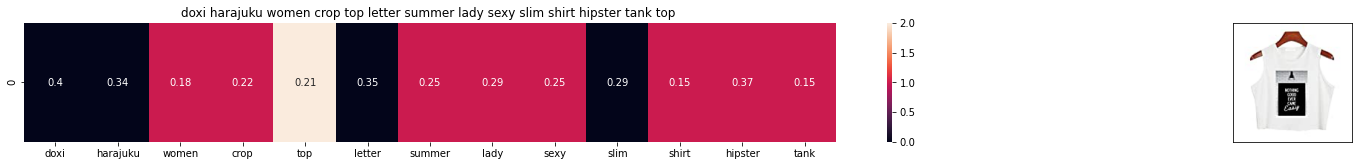

ASIN : B010V380LQ
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9525451871294602


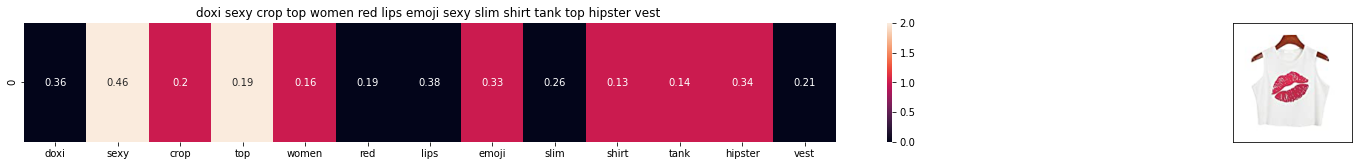

ASIN : B010TKXEHG
BRAND : Doxi Supermall
Eucliden distance from the given image : 0.9560746378208139


In [107]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12566, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

This execution shows us the 20 most similar products related to the apparel at Id = 12566 (tfidf model)

# 10. Summary

As you can see the system is quite accurately giving us the product recommendation. I think the BOW model is giving us quite a good variety of products and also displaying different types of brands. In tfidf model, the products are quite restricted to being similar and of the same brand but BOW is giving us a better variety since it is changing the brands.

# In this notebook we learned,

Basic data statistics.

How to build an easy recommendation system using BOW and TF-IDF.

Visualized the results with heatmaps and images from json files.

Used cosine similarity and pairwise distances as metrics to evaluate product similarity.

Due to time constraints and an easy to use application, I used only around 17k data points, if you have time to spare you can get even better results by not dropping the null values. On the other hand, removing duplicates was quite important as in the last fewer words the only thing irrelavant was the size of the apparel, it is pretty obvious the customer doesn't want to see the exact same product with only a change in the size, hence removing it was a must.

